# US Regional Sales Dataset

Fictitious sales data for a certain company across the US regions


# Objective


The target will be to optimization of customer and employee segment using unsupervised machine learning technique and RFMC segmentation:

# Business Understanding

In big ecommerce businesses customer segmentation and clustering and employee ranking is important and to optimize the resourcces and maximize the profit best pairing of both is necessaary for:

* Increasing revenue 
* Increasing customer retention
* Discovering Trends and patterns in data 
* Defining customers at risk

#  Features


* OrderNumber: Order number. Nominal, a 10-digit integral number uniquely assigned to each transaction. 

* WarehouseCode: 

# EDA and Pre Processing

In [1]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import random
from sklearn.metrics import silhouette_samples, silhouette_score
from pandas.plotting import scatter_matrix
from sklearn.cluster import MiniBatchKMeans
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('US_Regional_Sales_Data.xlsx')

In [3]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [4]:
data.shape

(7991, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Price        7991 n

In [6]:
data.dtypes


OrderNumber                 object
Sales Channel               object
WarehouseCode               object
ProcuredDate        datetime64[ns]
OrderDate           datetime64[ns]
ShipDate            datetime64[ns]
DeliveryDate        datetime64[ns]
CurrencyCode                object
_SalesTeamID                 int64
_CustomerID                  int64
_StoreID                     int64
_ProductID                   int64
Order Quantity               int64
Discount Applied           float64
Unit Price                 float64
Unit Cost                  float64
dtype: object

In [7]:
data.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Price          0
Unit Cost           0
dtype: int64

In [8]:
data['Sales Channel'].value_counts()

In-Store       3298
Online         2425
Distributor    1375
Wholesale       893
Name: Sales Channel, dtype: int64

In [9]:
data['_SalesTeamID'].nunique()

28

In [10]:
data['_CustomerID'].nunique()

50

In [11]:
data["Unit Price"] = [float(str(i).replace(",", "")) for i in data["Unit Price"]]
data["Unit Cost"] = [float(str(i).replace(",", "")) for i in data["Unit Cost"]]

## Sales Team RPT

In [12]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [13]:
data["Total_Price"]= data["Unit Price"] * data["Order Quantity"]

In [14]:
grouped_SalesTeam = data.groupby('_SalesTeamID',as_index= False)['Total_Price'].mean().sort_values(by='Total_Price', ascending=False)
grouped_SalesTeam.head()

,_SalesTeamID,Total_Price
1,2,11442.510569
25,26,11305.978378
10,11,11132.154325
21,22,11075.251128
14,15,11058.757934


In [15]:
grouped_SalesTeam.columns = ['SalesTeamID','RPT',]
grouped_SalesTeam.reset_index(inplace=True,drop=True)

In [16]:
grouped_SalesTeam["Ranked_SalesTeam_ID"] = np.arange(1, len(grouped_SalesTeam)+1)
grouped_SalesTeam['Team_percentile'] =(grouped_SalesTeam.RPT - grouped_SalesTeam.RPT.min()) / (grouped_SalesTeam.RPT.max() - grouped_SalesTeam.RPT.min())
grouped_SalesTeam.set_index("SalesTeamID",drop=True,inplace=True)
SalesTeam_data=grouped_SalesTeam.copy()
SalesTeam_data.head()

,RPT,Ranked_SalesTeam_ID,Team_percentile
SalesTeamID,,,
2,11442.510569,1,1.000000
26,11305.978378,2,0.937593
11,11132.154325,3,0.858141
22,11075.251128,4,0.832132
15,11058.757934,5,0.824593


# Customer Segmentation

In [17]:
data.rename(columns={'_CustomerID':'CustomerID'},inplace=True)

### Frequency

In [18]:
df = pd.DataFrame(data.groupby(['CustomerID']).count()['OrderNumber'])
df= df.rename(columns={'OrderNumber':'Frequency'})
df.head()

,Frequency
CustomerID,
1,152
2,135
3,181
4,167
5,159


### Recency

In [19]:
from datetime import datetime, timedelta
max_date = max(data['OrderDate'])+timedelta(days=1)
df['Recency']=data.groupby(['CustomerID']).agg({'OrderDate': lambda x: (max_date - x.max()).days})
df.head()

,Frequency,Recency
CustomerID,,
1,152,8
2,135,8
3,181,9
4,167,4
5,159,29


### MonetaryValue

In [20]:
totalamount = data['Order Quantity']*data['Unit Price']
data['TotalAmount'] = totalamount - totalamount*data['Discount Applied']
df['MonetaryValue']=data.groupby(['CustomerID'])['TotalAmount'].sum()
df.head()

,Frequency,Recency,MonetaryValue
CustomerID,,,
1,152,8,1.175021e+06
2,135,8,1.179320e+06
3,181,9,1.628232e+06
4,167,4,1.569468e+06
5,159,29,1.426164e+06


In [21]:
OnlyRFM=df.copy()

In [22]:
rfm_df=OnlyRFM.copy()

In [23]:
rfm_df.head()

,Frequency,Recency,MonetaryValue
CustomerID,,,
1,152,8,1.175021e+06
2,135,8,1.179320e+06
3,181,9,1.628232e+06
4,167,4,1.569468e+06
5,159,29,1.426164e+06


In [24]:
numerical=list(rfm_df.columns)

# Visualize

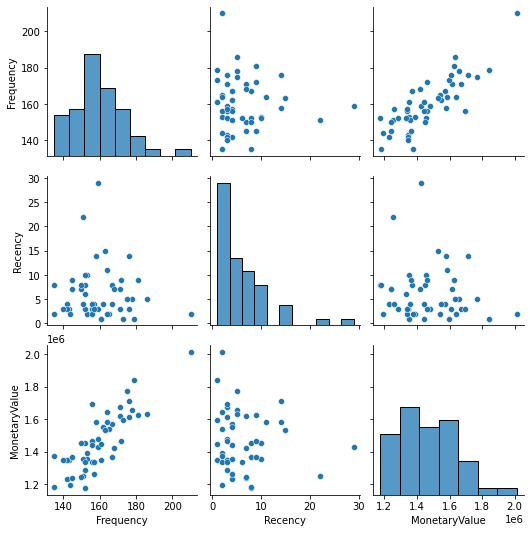

In [25]:
sns.pairplot(rfm_df)

The above diagram shows pairplot of all the numerical features.

<AxesSubplot:>

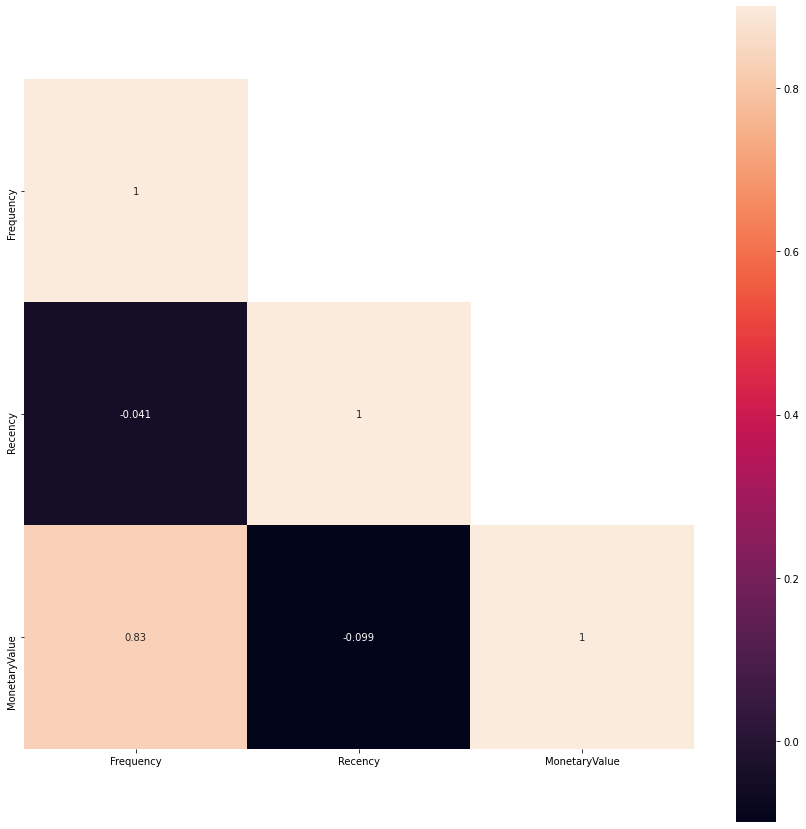

In [26]:
#create correlation
corr=rfm_df.corr()

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

The heatmap shows best correlation between Frequency and Monetary.

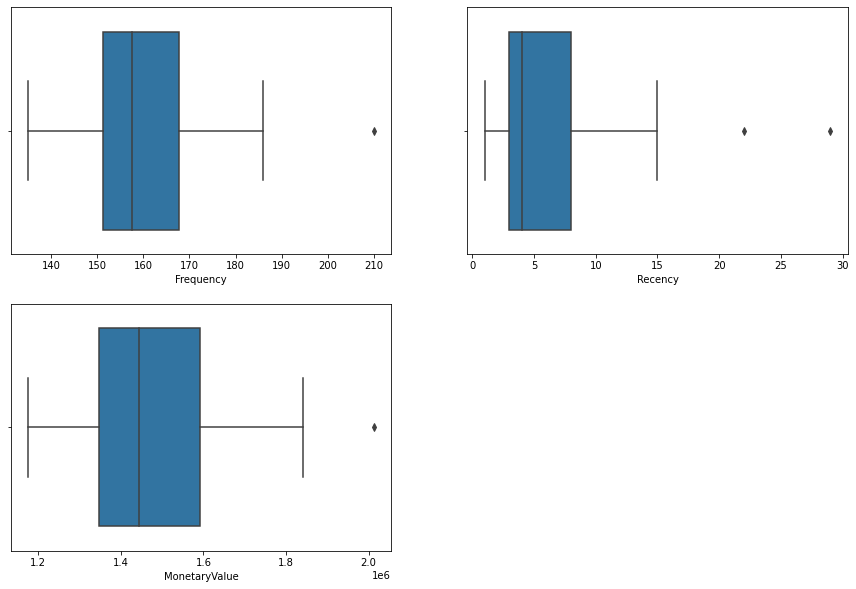

In [27]:
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = rfm_df, x = num)
plt.show()

Plotting Box plots to find outliers - The box plot shows outliers in the numerical features

No handles with labels found to put in legend.


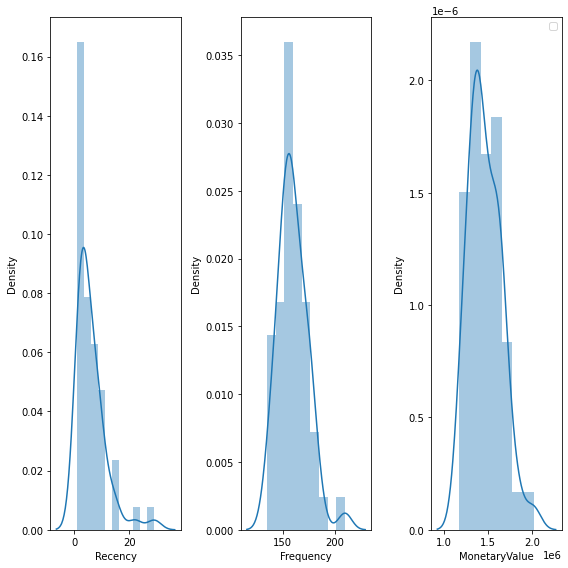

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,8))
sns.distplot(rfm_df["Recency"], ax=ax1)
sns.distplot(rfm_df["Frequency"], ax=ax2)
sns.distplot(rfm_df["MonetaryValue"], ax=ax3)
plt.tight_layout()
plt.legend()

There is little to no skewness so we can proceed without normalzation

# Clustering

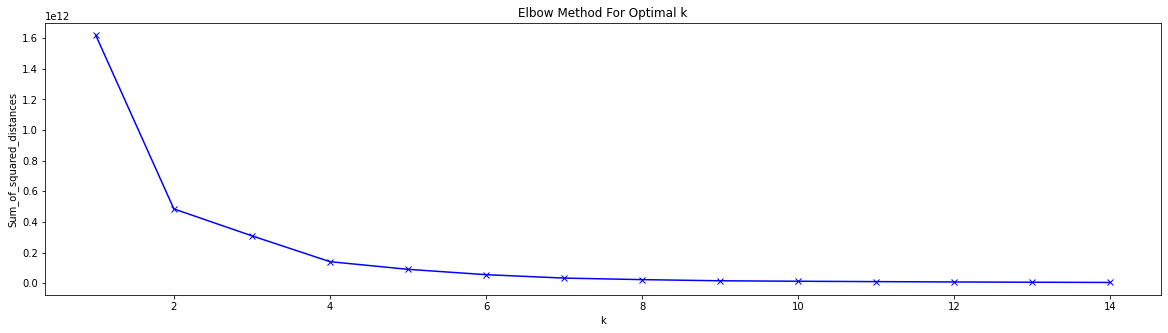

In [29]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rfm_df)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [30]:
print(Sum_of_squared_distances)

[1617329878777.8958, 485058843150.3721, 309457375729.0063, 140850472046.5955, 90890705609.93623, 56100009978.62275, 33771962472.434864, 23726464045.571823, 16207914048.35924, 13241042475.928883, 10767023226.995354, 8444735052.147464, 6717570818.02117, 5353622129.02081]


From the figure above we can see that the most optimal values are 2. So we choose 2 as the k values of the k-means model.

###  K Means

K-Means


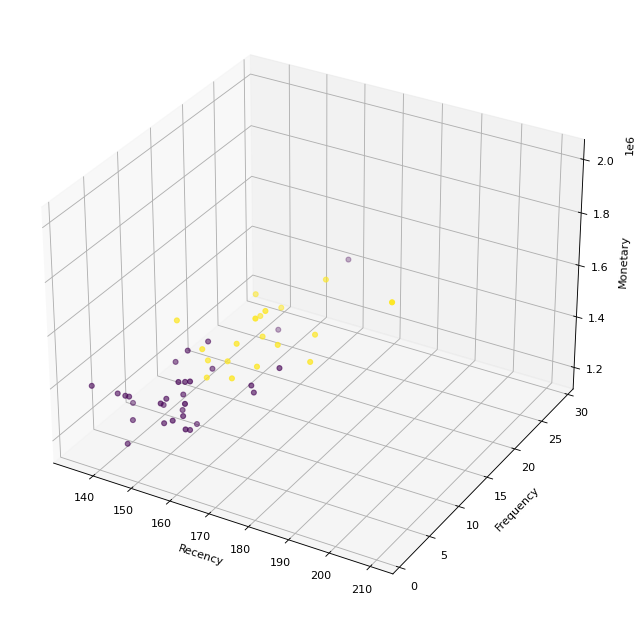

In [31]:
from mpl_toolkits.mplot3d import Axes3D
matrix = rfm_df.to_numpy()
model = KMeans(n_clusters=2)
model.fit(matrix)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=kmeans_labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("K-Means")

### Clusters K-Means

In [32]:
print("*******Number of customers in each cluster generated by K-Means (Elbow Method)*******")
pd.DataFrame(pd.Series(kmeans_labels).value_counts(), columns = ['Number of Customers']).T

*******Number of customers in each cluster generated by K-Means (Elbow Method)*******


,0,1
Number of Customers,31,19


In [33]:
# Clusters by K-Means (Elbow Method)
DS3_clustered_kmeans = rfm_df.assign(Cluster=kmeans_labels)
DS3_clustered_kmeans.head()

,Frequency,Recency,MonetaryValue,Cluster
CustomerID,,,,
1,152,8,1.175021e+06,0
2,135,8,1.179320e+06,0
3,181,9,1.628232e+06,1
4,167,4,1.569468e+06,1
5,159,29,1.426164e+06,0


In [34]:
grouped_kmeans = DS3_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Frequency,Recency,MonetaryValue
Cluster,,,
0,152.1,6.3,1345056.5
1,172.4,5.8,1655085.7


#### Creating Rank "C" for Clusters based on monetary value

In [35]:
if grouped_kmeans.loc[0,'MonetaryValue']>grouped_kmeans.loc[1,'MonetaryValue']:
    DS3_clustered_kmeans['C']=np.where(DS3_clustered_kmeans['Cluster']==0,1,0)
else:
    DS3_clustered_kmeans['C']=DS3_clustered_kmeans['Cluster']

#### Creating R F M C Discretized Scores and then creating segments

In [36]:
RFM_data=OnlyRFM.copy()
r_labels = range(5,0,-1)
r_quartiles = pd.qcut(RFM_data['Recency'], 5, labels = r_labels)
RFM_data = RFM_data.assign(R = r_quartiles.values)
f_labels = range(1, 6)
m_labels = range(1, 6)
f_quartiles = pd.qcut(RFM_data['Frequency'], 5, labels = f_labels)
m_quartiles = pd.qcut(RFM_data['MonetaryValue'], 5, labels = m_labels)
RFM_data = RFM_data.assign(F = f_quartiles.values)
RFM_data = RFM_data.assign(M = m_quartiles.values)
RFM_data.head(10)

,Frequency,Recency,MonetaryValue,R,F,M
CustomerID,,,,,,
1,152,8,1.175021e+06,2,2,1
2,135,8,1.179320e+06,2,1,1
3,181,9,1.628232e+06,2,5,5
4,167,4,1.569468e+06,3,4,4
5,159,29,1.426164e+06,1,3,3
6,143,3,1.347558e+06,4,1,2
7,153,2,1.388690e+06,5,2,3
8,142,4,1.230549e+06,3,1,1
9,171,7,1.617932e+06,2,4,4


In [37]:
DS3_clustered_kmeans=DS3_clustered_kmeans['C']
RFMC_data=RFM_data.merge(DS3_clustered_kmeans,on='CustomerID')
RFMC_data.head()

,Frequency,Recency,MonetaryValue,R,F,M,C
CustomerID,,,,,,,
1,152,8,1.175021e+06,2,2,1,0
2,135,8,1.179320e+06,2,1,1,0
3,181,9,1.628232e+06,2,5,5,1
4,167,4,1.569468e+06,3,4,4,1
5,159,29,1.426164e+06,1,3,3,0


In [38]:
def join_rfm(x):
    return (str(x['R']) + str(x['F']) + str(x['M']) + str(x['C']))

RFMC_data['RFMC_Segment'] = RFMC_data.apply(join_rfm, axis=1)

RFMC_data['RFMC_Score'] = RFMC_data[['R','F','M', 'C']].sum(axis=1)
RFMC_data.head()

,Frequency,Recency,MonetaryValue,R,F,M,C,RFMC_Segment,RFMC_Score
CustomerID,,,,,,,,,
1,152,8,1.175021e+06,2,2,1,0,2.02.01.00.0,5
2,135,8,1.179320e+06,2,1,1,0,2.01.01.00.0,4
3,181,9,1.628232e+06,2,5,5,1,2.05.05.01.0,13
4,167,4,1.569468e+06,3,4,4,1,3.04.04.01.0,12
5,159,29,1.426164e+06,1,3,3,0,1.03.03.00.0,7


#### Creating Loyalty level Groups on the basis of RFMC Score

In [39]:
Loyalty_Level = ['Iron','Bronze','Silver','Gold','Platinum']
Score_cuts = pd.qcut(RFMC_data.RFMC_Score, q = 5, labels = Loyalty_Level)
RFMC_data['RFMC_Loyalty_Level'] = Score_cuts.values
RFMC_data.head()

,Frequency,Recency,MonetaryValue,R,F,M,C,RFMC_Segment,RFMC_Score,RFMC_Loyalty_Level
CustomerID,,,,,,,,,,
1,152,8,1.175021e+06,2,2,1,0,2.02.01.00.0,5,Iron
2,135,8,1.179320e+06,2,1,1,0,2.01.01.00.0,4,Iron
3,181,9,1.628232e+06,2,5,5,1,2.05.05.01.0,13,Gold
4,167,4,1.569468e+06,3,4,4,1,3.04.04.01.0,12,Gold
5,159,29,1.426164e+06,1,3,3,0,1.03.03.00.0,7,Bronze


In [40]:
RFMC_data.sort_values(by=['RFMC_Score','MonetaryValue'], 
                      ascending=(False,False) , inplace= True)

In [41]:
RFMC_data.head()

,Frequency,Recency,MonetaryValue,R,F,M,C,RFMC_Segment,RFMC_Score,RFMC_Loyalty_Level
CustomerID,,,,,,,,,,
12,210,2,2.012877e+06,5,5,5,1,5.05.05.01.0,16,Platinum
29,179,1,1.841005e+06,5,5,5,1,5.05.05.01.0,16,Platinum
21,164,2,1.642715e+06,5,4,5,1,5.04.05.01.0,15,Platinum
32,173,1,1.595805e+06,5,5,4,1,5.05.04.01.0,15,Platinum
17,175,5,1.770662e+06,3,5,5,1,3.05.05.01.0,14,Platinum


In [42]:
rank = []
for i in range(len(df)):
    rank.append(i+1)
RFMC_data['Customer Rank'] = rank

## Creating Min Max Percentiles for Segments

Iron -> 0 - 0.19

Bronze -> 0.20 - 0.39

Silver -> 0.40 - 0.59

Gold -> 0.60 - 0.79

Silver -> 0.80 - 0.99

In [43]:
RFMC_data['Min_percentile']=np.where(RFMC_data["RFMC_Loyalty_Level"]=='Platinum',0.80,
                                     np.where(RFMC_data["RFMC_Loyalty_Level"]=='Gold',0.60,
                                             np.where(RFMC_data["RFMC_Loyalty_Level"]=='Silver',0.4,
                                                     np.where(RFMC_data["RFMC_Loyalty_Level"]=='Bronze',0.2,
                                                             np.where(RFMC_data["RFMC_Loyalty_Level"]=='Iron',0,-1)))))

In [44]:
RFMC_data['Max_percentile']=np.where(RFMC_data["RFMC_Loyalty_Level"]=='Platinum',0.99,
                                     np.where(RFMC_data["RFMC_Loyalty_Level"]=='Gold',0.79,
                                             np.where(RFMC_data["RFMC_Loyalty_Level"]=='Silver',0.59,
                                                     np.where(RFMC_data["RFMC_Loyalty_Level"]=='Bronze',0.39,
                                                             np.where(RFMC_data["RFMC_Loyalty_Level"]=='Iron',0.19,-1)))))

In [45]:
RFMC_data.head(10)

,Frequency,Recency,MonetaryValue,R,F,M,C,RFMC_Segment,RFMC_Score,RFMC_Loyalty_Level,Customer Rank,Min_percentile,Max_percentile
CustomerID,,,,,,,,,,,,,
12,210,2,2.012877e+06,5,5,5,1,5.05.05.01.0,16,Platinum,1,0.8,0.99
29,179,1,1.841005e+06,5,5,5,1,5.05.05.01.0,16,Platinum,2,0.8,0.99
21,164,2,1.642715e+06,5,4,5,1,5.04.05.01.0,15,Platinum,3,0.8,0.99
32,173,1,1.595805e+06,5,5,4,1,5.05.04.01.0,15,Platinum,4,0.8,0.99
17,175,5,1.770662e+06,3,5,5,1,3.05.05.01.0,14,Platinum,5,0.8,0.99
13,171,3,1.673218e+06,4,4,5,1,4.04.05.01.0,14,Platinum,6,0.8,0.99
11,178,5,1.658925e+06,3,5,5,1,3.05.05.01.0,14,Platinum,7,0.8,0.99
18,186,5,1.631553e+06,3,5,5,1,3.05.05.01.0,14,Platinum,8,0.8,0.99
39,176,3,1.610879e+06,4,5,4,1,4.05.04.01.0,14,Platinum,9,0.8,0.99


# Optimization Algorithm and Final Pipeline

In [46]:
def pred_pipeline(CustomerId,customertable,employeetable):
    
    if CustomerId in customertable.index:
        Customer_group_percentile=random.uniform(customertable.loc[CustomerId,'Min_percentile'],
                                                customertable.loc[CustomerId,'Max_percentile'])
    else:
        Customer_group_percentile=random.random()
    print("Customer ID: ",CustomerId,"\nCustomer Percentile: ",Customer_group_percentile)
    employeetable_x=employeetable.copy()
    employeetable_x['Eval_scores']=np.abs(employeetable_x['Team_percentile']-Customer_group_percentile)
    print("Assigned Sales Team ID: ", employeetable_x['Eval_scores'].idxmin())
    print("Sales Team Percentile: ",employeetable_x['Eval_scores'].min())
    

In [47]:
pred_pipeline(15,RFMC_data,grouped_SalesTeam)

Customer ID:  15 
Customer Percentile:  0.3628095574082052
Assigned Sales Team ID:  17
Sales Team Percentile:  0.009103937212044


In [48]:
pred_pipeline(35,RFMC_data,grouped_SalesTeam)

Customer ID:  35 
Customer Percentile:  0.04248174262465788
Assigned Sales Team ID:  27
Sales Team Percentile:  0.04248174262465788


# Thank You